# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from IPython.display import Image
import tensorflow as tf

import numpy as np
import torch

from utilities.utility_functions import *

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [11]:
t1 = tf.constant([1,2,3,4, 6, 6])

In [8]:
np.transpose(tf.split(t1, 2))

array([[1, 3],
       [2, 4]], dtype=int32)

In [15]:
tf.transpose(tf.split(t1, 2)).shape[0]

3

In [16]:
tf.split(tf.transpose(tf.split(t1, 2)), tf.transpose(tf.split(t1, 2)).shape[0])

[<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 4]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[2, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[3, 6]], dtype=int32)>]

In [2]:
X, y = load_breast_cancer(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [3]:
X, y = load_iris(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
X, y = load_breast_cancer(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)[:,:4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [5]:
X_train.shape

(381, 4)

In [6]:
y_test.shape

(188,)

In [7]:
print(X_train.shape[1])
print(int(max(y_train))+1)

4
2


In [8]:
depth = 2
beta = 1
decision_sparsity = 2

In [9]:
tree = SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=depth,
          beta=beta,
          decision_sparsity=-1,
          use_cuda=False,
          verbosity=1)

In [10]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936],
        [ 0.4408, -0.3668,  0.4346,  0.0936]], requires_grad=True)

In [11]:
tree.inner_nodes[0].bias

Parameter containing:
tensor([0.3694, 0.0677, 0.2411], requires_grad=True)

In [12]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[-0.0706,  0.3854,  0.0739, -0.2334],
        [ 0.1274, -0.2304, -0.0586, -0.2031]], requires_grad=True)

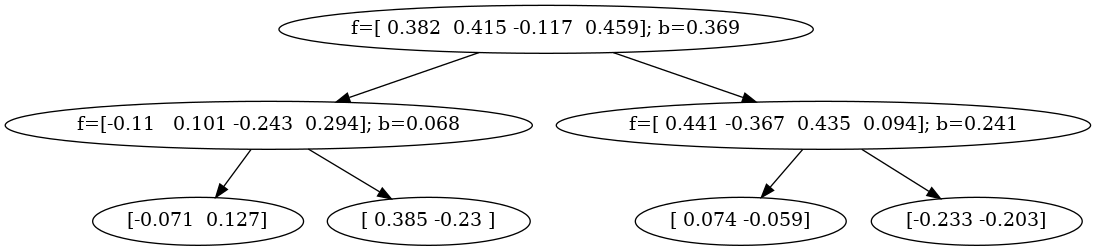

In [13]:
tree.plot_tree()

In [14]:
tree.fit(X_train[:], y_train[:], batch_size=32, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 00 | Loss: 0.68602 | Correct: 238/381
Epoch: 01 | Loss: 0.65127 | Correct: 292/381
Epoch: 02 | Loss: 0.60900 | Correct: 316/381
Epoch: 03 | Loss: 0.55799 | Correct: 330/381
Epoch: 04 | Loss: 0.51272 | Correct: 334/381
Epoch: 05 | Loss: 0.47619 | Correct: 334/381
Epoch: 06 | Loss: 0.44399 | Correct: 335/381
Epoch: 07 | Loss: 0.41757 | Correct: 336/381
Epoch: 08 | Loss: 0.39878 | Correct: 336/381
Epoch: 09 | Loss: 0.38461 | Correct: 336/381


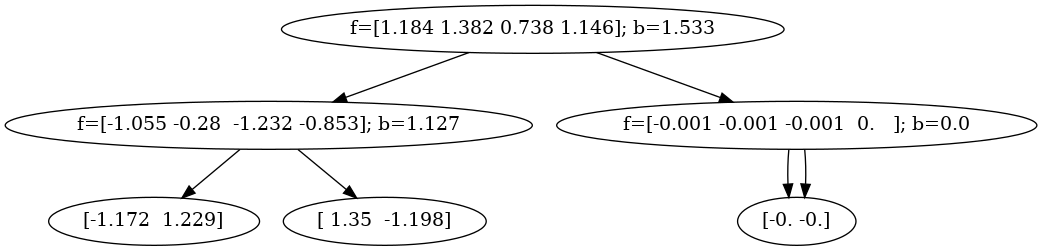

In [15]:
tree.plot_tree()

In [16]:
tree.evaluate(X_test, y_test)


Testing Accuracy: 170.0/188 (90.426%)



0.9042553191489362

In [17]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[     1.1842,      1.3815,      0.7384,      1.1463],
        [    -1.0549,     -0.2799,     -1.2324,     -0.8532],
        [    -0.0011,     -0.0008,     -0.0010,      0.0003]],
       requires_grad=True)

In [18]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[    -1.1722,      1.3501,     -0.0001,     -0.0000],
        [     1.2290,     -1.1980,     -0.0001,     -0.0004]],
       requires_grad=True)

In [19]:
tree = SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=depth,
          beta=beta,
          decision_sparsity=decision_sparsity,
          use_cuda=False,
          verbosity=1)

In [20]:
np.array([[1,2,3,4], [1,2,3,4]])[0][[1,2]]

array([2, 3])

In [21]:
largest_indices(np.array([1,3,5,4]), 2)

(array([2, 3]),)

In [22]:
tree.fit(X_train[:], y_train[:], batch_size=32, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 00 | Loss: 0.68703 | Correct: 236/381
Epoch: 01 | Loss: 0.68153 | Correct: 236/381
Epoch: 02 | Loss: 0.67716 | Correct: 236/381
Epoch: 03 | Loss: 0.67423 | Correct: 236/381
Epoch: 04 | Loss: 0.67264 | Correct: 236/381
Epoch: 05 | Loss: 0.67191 | Correct: 236/381
Epoch: 06 | Loss: 0.67159 | Correct: 236/381
Epoch: 07 | Loss: 0.67142 | Correct: 236/381
Epoch: 08 | Loss: 0.67131 | Correct: 236/381
Epoch: 09 | Loss: 0.67123 | Correct: 236/381


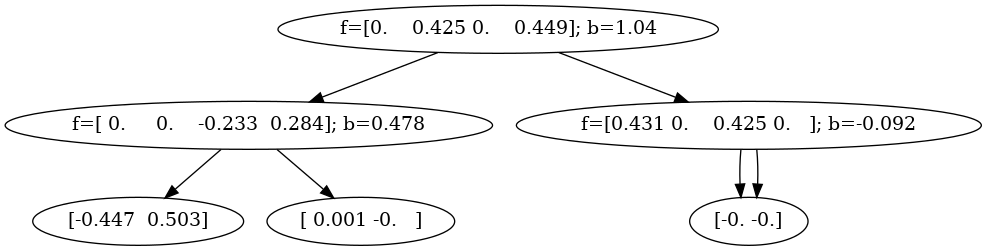

In [23]:
tree.plot_tree()

In [24]:
tree.evaluate(X_test, y_test)


Testing Accuracy: 121.0/188 (64.362%)



0.6436170212765957

In [25]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[ 0.0000,  0.4250,  0.0000,  0.4493],
        [ 0.0000,  0.0000, -0.2334,  0.2836],
        [ 0.4308,  0.0000,  0.4246,  0.0000]], requires_grad=True)

In [26]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[    -0.4465,      0.0010,     -0.0001,     -0.0000],
        [     0.5026,     -0.0001,     -0.0001,     -0.0004]],
       requires_grad=True)

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_sk = DecisionTreeClassifier(max_depth=depth)

In [28]:
tree_sk.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [29]:
from sklearn.metrics import accuracy_score
y_pred =  tree_sk.predict(X_test)

print('Accuracy :',  accuracy_score(y_test, y_pred))

Accuracy : 0.8882978723404256


[Text(167.4, 181.2, 'X[2] <= 0.339\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(83.7, 108.72, 'X[2] <= 0.287\ngini = 0.17\nsamples = 234\nvalue = [22, 212]'),
 Text(41.85, 36.23999999999998, 'gini = 0.101\nsamples = 187\nvalue = [10, 177]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.38\nsamples = 47\nvalue = [12, 35]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.233\ngini = 0.273\nsamples = 147\nvalue = [123, 24]'),
 Text(209.25, 36.23999999999998, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(292.95, 36.23999999999998, 'gini = 0.157\nsamples = 128\nvalue = [117, 11]')]

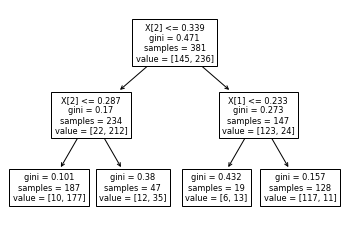

In [30]:
from sklearn import tree as sklearn_tree
sklearn_tree.plot_tree(tree_sk) 

In [31]:
config = {
    'function_family': {},
    'data': {},
    'i_net': {}
}

In [32]:
config['data']['number_of_variables'] = X_train.shape[1]
config['data']['num_classes'] = int(max(y_train))+1
config['function_family']['maximum_depth'] = depth
config['function_family']['decision_sparsity'] = decision_sparsity
config['i_net']['function_representation_type'] = 2


In [33]:
flat_parameters = tree.to_array()
flat_parameters

array([ 0.        ,  0.42500383,  0.        ,  0.4493059 ,  0.        ,
        0.        , -0.23342852,  0.28364155,  0.43077186,  0.        ,
        0.4245985 ,  0.        ,  1.0395269 ,  0.4781834 , -0.09225046,
       -0.44651178,  0.50258726,  0.00096973, -0.00007192, -0.00008686,
       -0.0000865 , -0.00000251, -0.00039681], dtype=float32)

In [34]:
flat_parameters = tree.to_array(config)
flat_parameters

self.internal_node_num_ 3
i 0
topk [3 1]
top_value_index 3
top_value_index 1
i 1
topk [3 2]
top_value_index 3
top_value_index 2
i 2
topk [0 2]
top_value_index 0
top_value_index 2


array([ 0.4493059 ,  0.42500383,  0.28364155, -0.23342852,  0.43077186,
        0.4245985 ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.0395269 ,  0.4781834 , -0.09225046, -0.44651178,  0.50258726,
        0.00096973, -0.00007192, -0.00008686, -0.0000865 , -0.00000251,
       -0.00039681], dtype=float32)

In [ ]:
get_shaped_parameters_for_decision_tree(flat_parameters, config)

(6,)
(24,)
(3,)
(8,)
weights_coeff_list_by_internal_node tf.Tensor(
[[ 0.4493059   0.28364155  0.43077186]
 [ 0.42500383 -0.23342852  0.4245985 ]], shape=(2, 3), dtype=float32)
weights_index_list_by_internal_node tf.Tensor(
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]], shape=(8, 3), dtype=float32)
weights_index_list_by_internal_node_by_var [<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [1., 1., 0.]], dtype=float32)>, <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [1., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 0.]], dtype=float32)>]
weights_index_list_by_internal_node_by_var [<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [1., 0.]], dtype=float32)>, <tf.Tensor: 

In [ ]:
zeros = tf.zeros((4,3))
zeros

In [ ]:
indices = [2,1]
indices = tf.cast(tf.reshape(tf.sort(tf.constant(indices)), (-1,1)), tf.int64)
indices

In [ ]:
values = tf.constant([1.3,2.3])

In [ ]:
sparse = tf.sparse.SparseTensor(indices=indices, values=[3,2], dense_shape=[3])
sparse

In [ ]:
dense = tf.sparse.to_dense(sparse)
dense

In [ ]:
zeros[0][1] = 1

In [ ]:
tf.gather(zeros[0], [1,2])

In [ ]:
zeros[[0,0], [1,1]]

In [ ]:
zeros[1] = 1.3
zeros

In [ ]:
zeros[indices] = values

In [ ]:
tree = SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=2,
          beta=1,
          decision_sparsity=-1,
          use_cuda=False,
          verbosity=1)

In [ ]:
tree.inner_nodes[0].weight

In [ ]:
tree.evaluate(X_test, y_test)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2
tree.plot_tree()

In [ ]:
tree.predict([[0,0,0,-2]])

In [ ]:
value=2
feature_index = 3

In [ ]:
import tensorflow as tf

In [ ]:
prob1 = tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy())*tf.math.sigmoid(value*tree.inner_nodes[0].weight[1][feature_index].detach().numpy()+tree.inner_nodes[0].bias[1].detach().numpy())
prob1

In [ ]:
prob2 = tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy())*(1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[1][feature_index].detach().numpy()+tree.inner_nodes[0].bias[1].detach().numpy()))
prob2

In [ ]:
prob3 = (1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy()))*tf.math.sigmoid(value*tree.inner_nodes[0].weight[2][feature_index].detach().numpy()+tree.inner_nodes[0].bias[2].detach().numpy())
prob3

In [ ]:
prob4 = (1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy()))*(1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[2][feature_index].detach().numpy()+tree.inner_nodes[0].bias[2].detach().numpy()))
prob4

In [ ]:
o1 = prob1*tree.leaf_nodes.weight.T[0].detach().numpy()
o1

In [ ]:
o2 = prob2*tree.leaf_nodes.weight.T[1].detach().numpy()
o2

In [ ]:
o3 = prob3*tree.leaf_nodes.weight.T[2].detach().numpy()
o3

In [ ]:
o4 = prob4*tree.leaf_nodes.weight.T[3].detach().numpy()
o4

In [ ]:
tf.nn.softmax(tf.reduce_sum([o1, o2, o3, o4], axis=0))

In [ ]:
tf.nn.softmax(o1)

In [ ]:
tree.inner_nodes[0].weight

In [ ]:
tf.math.sigmoid(2*1.115+0.014)

In [ ]:
tf.math.sigmoid(2*1.01-0.142)

In [ ]:
%autoreload 2

parameters = tree.to_array()
print(parameters)